In [1]:
import sys
import os
build_path = os.path.join(os.getcwd(), "..", "build")
!cmake -B {build_path} -DPYTHON_EXECUTABLE={sys.executable} -Wno-dev ..
!cmake --build {build_path}
if build_path not in sys.path:
    sys.path.append(build_path)
import pypumila
# to reload pypumila, restart python kernel.
# importlib.reload(pypumila) <- does not work

-- Eigen3 found
-- SDL2 and SDL2TTF found
-- Fetching pybind11 source...
-- pybind11 v2.11.1 
-- Fetching BS::thread_pool source...
-- Fetching roboto font...
-- Configuring done (1.4s)
-- Generating done (0.0s)
-- Build files have been written to: /Users/kou/projects/pumila/build
[  9%] Building CXX object CMakeFiles/pumila.dir/src/pumila/window.cc.o
[ 18%] Building CXX object CMakeFiles/pumila.dir/src/pumila/game.cc.o
[ 27%] Building CXX object CMakeFiles/pumila.dir/src/pumila/models/pumila1.cc.o
[ 36%] Linking CXX shared library libpumila.dylib
ld: warning: ignoring duplicate libraries: '-lSDL2', '-lSDL2_ttf'
[ 63%] Built target pumila
[ 72%] Building CXX object CMakeFiles/pypumila.dir/src/pypumila/pypumila.cc.o
[ 81%] Linking CXX shared module pypumila.cpython-312-darwin.so
[ 81%] Built target pypumila
[ 90%] Building CXX object CMakeFiles/pumila-play.dir/src/play/main.cc.o
[100%] Linking CXX executable pumila-play
[100%] Built target pumila-play


In [2]:
os.chdir(build_path)
sim = pypumila.GameSim()
window = pypumila.Window(sim)

In [14]:
def print_sim():
    for row in reversed(sim.field.field):
        print(", ".join([str(p) for p in row]))
    print(f"score = {sim.score}")
    print(f"current = {sim.get_current_pair()}")
    print(f"next = {sim.next_pair}")
    print(f"next2 = {sim.next2_pair}")
print_sim()

Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.green, Puyo.green, Puyo.none, Puyo.none, Puyo.none
score = 0
current = <PuyoPair bottom = 0, top = 0, x = 2, y = 12.000000, rot = 0>
next = <PuyoPair bottom = 4, top = 4, x = 2, y = 12.000000, rot = 0>
ne

In [3]:
model = pypumila.Pumila1(0.1, 0.1, 0.1)

In [4]:
import numpy as np

In [20]:
q = model.forward(sim)
q

[-80.30995683077586,
 -80.7771881453368,
 -80.95440209906859,
 -80.2158222304282,
 -80.12363432697458,
 -80.44546483920475,
 -80.07465994723341,
 -80.63626628008899,
 -80.24120021387094,
 -80.56975213214147,
 -80.30196367425381,
 -80.00049695738075,
 -80.50851884055895,
 -80.48972346775295,
 -81.16149637433264,
 -80.51997143368969,
 -79.89890017231255,
 -80.36654204987667,
 -81.24145859152291,
 -80.36744501772945,
 -80.46197627177229,
 -80.62385251962264]

In [21]:
a = np.argmax(np.array(q))
sim.put(pypumila.actions[a])
while not sim.is_free_phase():
    sim.step()
print_sim()

Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.green, Puyo.green, Puyo.none, Puyo.yellow, Puyo.blue
score = 0
current = <PuyoPair bottom = 3, top = 3, x = 2, y = 12.000000, rot = 0>
next = <PuyoPair bottom = 4, top = 4, x = 2, y = 12.000000, rot = 0>


In [22]:
model.backward(sim, a, -1)

In [23]:
sim.current_chain.chain_num

AttributeError: 'NoneType' object has no attribute 'chain_num'

In [33]:
# from tqdm.notebook import tqdm
model = pypumila.Pumila1(0.001, 0.001, 0.001)
hist = []
scores = []
for e in range(200):
    sim = pypumila.GameSim()
    for e2 in range(20):
        q = model.forward(sim)
        a = np.argmax(np.array(q))
        sim.put(pypumila.actions[a])
        t = -1
        while not sim.is_free_phase():
            sim.step()
            if sim.current_chain:
                t = sim.current_chain.chain_num * 100
        # print_sim()
        hist.append(t)
        scores.append(sim.score)
        model.backward(sim, a, t)

In [35]:
import matplotlib.pyplot as plt

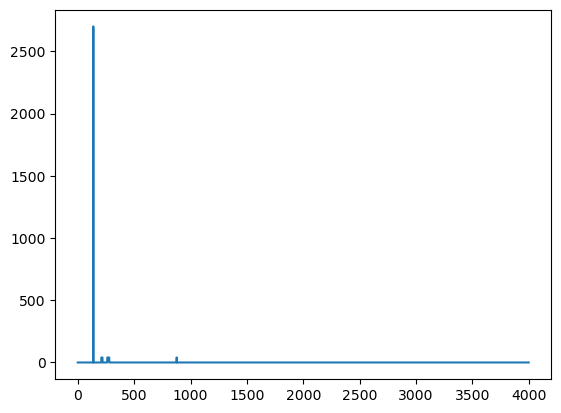

In [44]:
plt.plot(scores)

In [47]:
sim = pypumila.GameSim()
for e2 in range(20):
    q = model.forward(sim)
    a = np.argmax(np.array(q))
    sim.put(pypumila.actions[a])
    t = -1
    while not sim.is_free_phase():
        sim.step()
        if sim.current_chain:
            t = sim.current_chain.chain_num * 100
    print_sim()

Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.green, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.red, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
score = 0
current = <PuyoPair bottom = 1, top = 1, x = 2, y = 12.000000, rot = 0>
next = <PuyoPair bottom = 1, top = 1, x = 2, y = 12.000000, rot = 0>
next

In [49]:
model_empty = pypumila.Pumila1(0.001, 0.001, 0.001)
sim = pypumila.GameSim()
for e2 in range(20):
    q = model_empty.forward(sim)
    a = np.argmax(np.array(q))
    sim.put(pypumila.actions[a])
    t = -1
    while not sim.is_free_phase():
        sim.step()
        if sim.current_chain:
            t = sim.current_chain.chain_num * 100
    print_sim()

Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none, Puyo.none
Puyo.none, Puyo.red, Puyo.yellow, Puyo.none, Puyo.none, Puyo.none
score = 0
current = <PuyoPair bottom = 2, top = 2, x = 2, y = 12.000000, rot = 0>
next = <PuyoPair bottom = 1, top = 1, x = 2, y = 12.000000, rot = 0>
nex